<a href="https://colab.research.google.com/github/samuelbolugee/PythonDSProjects/blob/main/AdvancedAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Advanced Analytics with Python - The EDA Series

Hi, and welcome once again to another EDA notebook, where I will be focusing on advanced analytics in Python. I will be covering methods such as the violin plot, swarm plot, Andrews Curve, and some advanced analytical methods such as PCA and the Shapiro-Wilk Test for Normality.

Now, wthout further ado, let's go!

##Violin Plots

Violin plots are used when you want to observe the distribution of numeric data, and are especially useful when you want to make a comparison of distributions between multiple groups.

A violin plot is a combination of a box plot and a kernel density plot. This plot provides a clearer picture of the data distribution compared to just a box plot, as it also includes information about the data density.

Key Features:

1. The plot consists of one or more "violins," each representing a different category.
2. The width of each violin indicates the data density at different values.
3. The box inside each violin shows the quartiles (25th, 50th, and 75th percentiles) of the data distribution.
4. The extended lines, called "whiskers," represent the minimum and maximum values within a certain range.

Violin plots are especially useful for comparing the distributions of different categories, identifying data skewness, and understanding the underlying patterns in the data.

Let's see how to create a violin plot.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine
dt = load_wine()

# Convert into a DataFrame
df = pd.DataFrame(data = dt.data, columns = dt.feature_names)
#Create the target class
df['target'] = dt.target

df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


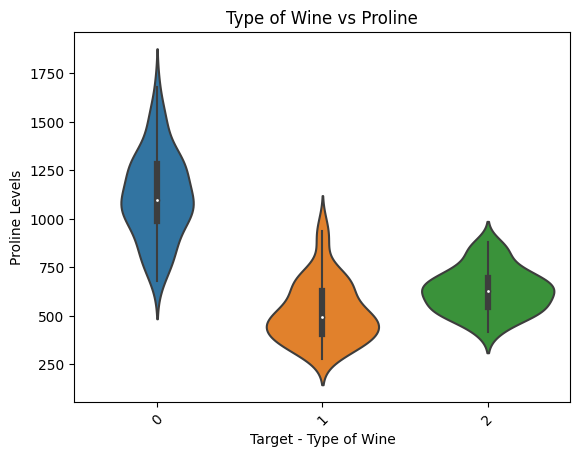

In [4]:
# Now, we call our violinplot() from Seaborn:
sns.violinplot(x = df["target"], y = df["proline"])
plt.xlabel("Target - Type of Wine")
plt.ylabel("Proline Levels")
plt.title("Type of Wine vs Proline")
plt.xticks(rotation=45)
plt.show()

##Swarm Plot
A swarm plot is a categorical scatter plot that displays individual data points along an axis. It helps to visualize the distribution of data points within categories while avoiding overlap between points.

Key Features:

1. In a swarm plot, data points are plotted along the categorical axis with slight jittering to prevent overlapping.
2. Each data point's vertical position represents its actual value within the category.

Swarm plots are useful when you have a moderate amount of data and want to see the distribution of individual observations within each category.

Let's implement one, shall we?

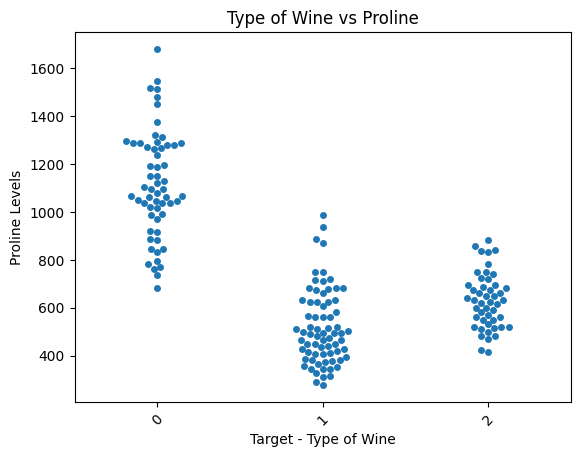

In [5]:
# Now, we call our violinplot() from Seaborn:
sns.swarmplot(x = df["target"], y = df["proline"])
plt.xlabel("Target - Type of Wine")
plt.ylabel("Proline Levels")
plt.title("Type of Wine vs Proline")
plt.xticks(rotation=45)
plt.show()

##Andrews Curves
Andrews Curves are a method for visualizing multivariate data using Fourier series. Each observation's attribute values are treated as coefficients of a Fourier series, and the resulting curve represents the observation.

Key Features:

1. In Andrews Curves, each observation is represented by a curve on a plot.
2. The shape of the curve gives insights into the pattern of attributes across observations.
3. If two observations have similar curves, it indicates similarity in their attribute patterns.

Andrews Curves are useful for identifying patterns, clusters, or any regularities in multivariate data. They can help you spot groups of similar observations and gain a high-level understanding of the dataset's structure.

To pull this off, we'll have to import ```andrews_curves``` from ```pandas.plotting```.

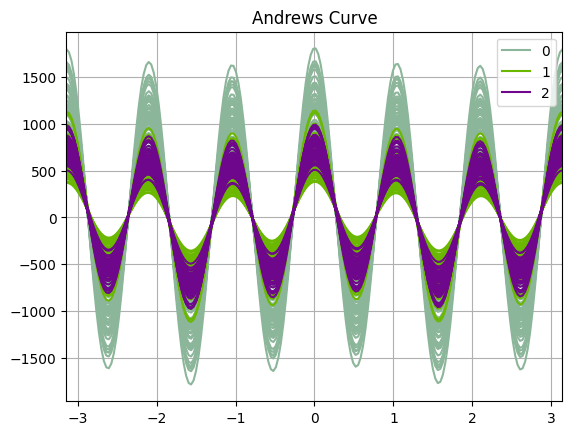

In [8]:
from pandas.plotting import andrews_curves

andrews_curves(df, 'target') #Pass only the name of the categorical column!
plt.title("Andrews Curve")
plt.show()

##Principal Component Analysis

Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in data analysis and machine learning to transform high-dimensional data into a lower-dimensional representation while preserving as much variance as possible. PCA is especially useful when dealing with datasets that have a large number of features or dimensions, as it helps simplify the data without losing critical information.

This method was one of the methods of multivariate statistics created before the Second World War. See [this paper](https://www.sciencedirect.com/science/article/abs/pii/009830049390090R) for more information.

**How PCA Works:**

1. Centering the Data: Before applying PCA, it's common to center the data by subtracting the mean of each feature from its values. This step ensures that the data is centered around the origin.

2. Computing the Covariance Matrix: PCA calculates the covariance matrix of the centered data. The covariance matrix provides insights into the relationships and dependencies between different features.

3. Eigendecomposition: PCA seeks the eigenvectors and eigenvalues of the covariance matrix. Eigenvectors are the directions along which the data varies the most, and eigenvalues represent the variance along those directions. These eigenvectors and eigenvalues form the principal components.

4. Selecting Principal Components: The eigenvectors are ranked by their corresponding eigenvalues. The eigenvector with the highest eigenvalue is the first principal component (PC1), the second highest eigenvalue corresponds to the second principal component (PC2), and so on.

5. Dimensionality Reduction: PCA involves selecting a subset of the principal components that capture most of the variance in the data. This selection helps reduce the dimensionality while retaining the majority of the information.

Let's implement it on our dataset.

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # Think of n_components as the number of dimensions that you want to represent your data in. This is a hyperparameter.
pca_result = pca.fit_transform(df[['alcohol','proline']]) # Applying this to to columns only - pass those column names in a list, which will be in the list to "index" your data
pca_result

array([[ 3.18108344e+02,  7.01480808e-01],
       [ 3.03106655e+02, -3.03625208e-01],
       [ 4.38106403e+02, -5.67658241e-01],
       [ 7.33108005e+02,  1.52786310e-01],
       [-1.18928448e+01,  2.59118607e-01],
       [ 7.03107764e+02,  3.25716744e-02],
       [ 5.43108299e+02,  4.88092109e-01],
       [ 5.48107745e+02,  1.49795042e-01],
       [ 2.98109367e+02,  1.33467007e+00],
       [ 2.98107757e+02,  3.64671405e-01],
       [ 7.63107515e+02, -1.66998449e-01],
       [ 5.33107865e+02,  2.34687524e-01],
       [ 5.73107196e+02, -2.01692140e-01],
       [ 4.03109090e+02,  1.08042222e+00],
       [ 8.00107929e+02,  5.15995046e-02],
       [ 5.63107011e+02, -3.05096932e-01],
       [ 5.33108164e+02,  4.14687276e-01],
       [ 3.83107590e+02,  1.93613576e-01],
       [ 9.33107430e+02, -3.59114312e-01],
       [ 9.81076675e+01,  4.76572578e-01],
       [ 3.31084540e+01,  1.00443978e+00],
       [ 2.31065926e+01, -1.08963618e-01],
       [ 2.88107522e+02,  2.31266655e-01],
       [ 2.

For more information on selecting the best value for ```n_components```, see this article [here](https://towardsdatascience.com/how-to-select-the-best-number-of-principal-components-for-the-dataset-287e64b14c6d).

##The Shapiro-Wilk Test for Normality

The Shapiro-Wilk test is used to check if a given dataset follows a normal distribution. It's important for many statistical analyses that assume normality. While it is more appropriate for small sample sizes (less than 50), it can be applied towards sample sizes of up to 2000. It was first introduced in 1965 by Samuel Shapiro and Martin Wilk.

In [12]:
from scipy.stats import shapiro

#Perform test for normality on the 'alcohol' column

statistic, p_value = shapiro(df['alcohol'])

if p_value > 0.05:
  print(f"With a p-value of {p_value}, the column data is normally distributed")
else:
  print(f"With a p-value of {p_value}, the column data is not normally distributed")

With a p-value of 0.020050711929798126, the column data is not normally distributed
